# Predicting Work Preference of Technologists using Machine Learning

This notebook presents a machine learning project with the goal of predicting whether a technologist will prefer to work remotely or physically based on the stackover 2023 developer survey. With the rise of remote work and the increasing demand for flexible work environments, understanding the factors that influence a technologist's work preference can be valuable for companies, recruiters, and policymakers.

## Problem Statement

Given the survey respondents result of developers on stack overflow, Can we build a machine learning model that accurately predicts whether a technologist prefers to work remotely or physically?

## Data Source

For this project, we will use a dataset containing survey response from respondents in stackoverflow 2023. The data is downloaded from stack overflow website; https://survey.stackoverflow.co/

## Evaluation

We are going to be measure the efficiency of the model against criteria such as Accuracy, Precicion, Recall and F1

## Features

For this project, we will use a limited set of carefully selected features from survey respondents dataset to predict whether a technologist prefers to work remotely or physically. Instead of using a large number of features, we will focus on key factors that are most likely to influence work preference.

1.  MainBranch: Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code". *
2.  Age: What is your age?
3.  Employment: Which of the following best describes your current employment status? Select all that apply.
4.  EdLevel: Which of the following best describes the highest level of formal education that youâ€™ve completed? *
5.  YearsCode: Including any education, how many years have you been coding in total?
6.  YearsCodePro: NOT including education, how many years have you coded professionally (as a part of your work)?
7.  DevType: Which of the following describes your current job, the one you do most of the time? Please select only one.
8.  OrgSize: Approximately how many people are employed by the company or organization you currently work for?
9.  Country: Where do you live?
10. ConvertedCompYearly: What is your current total annual income converted to a base rate



## Data Preparation and Exploration

### Import packages and libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# we want our plots to appear inside the notebook
%matplotlib inline 

### Import dataset

In [2]:
df = pd.read_csv("survey_results_public.csv")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


### Preprocess and Explore Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [4]:
# List of selected columns

selected_columns = [
    "MainBranch",
    "Age",
    "Employment",
    "RemoteWork",
    "EdLevel",
    "YearsCode",
    "YearsCodePro",
    "DevType",
    "OrgSize",
    "Country",
    "ConvertedCompYearly"
]

In [5]:
# Creating new dataframs with only selected columns
df_copy = df
df = df[selected_columns]
print(df)

                           MainBranch                 Age  \
0                       None of these     18-24 years old   
1      I am a developer by profession     25-34 years old   
2      I am a developer by profession     45-54 years old   
3      I am a developer by profession     25-34 years old   
4      I am a developer by profession     25-34 years old   
...                               ...                 ...   
89179  I am a developer by profession     25-34 years old   
89180  I am a developer by profession     18-24 years old   
89181     I code primarily as a hobby   Prefer not to say   
89182  I am a developer by profession  Under 18 years old   
89183  I am a developer by profession     35-44 years old   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                          

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           89184 non-null  object 
 1   Age                  89184 non-null  object 
 2   Employment           87898 non-null  object 
 3   RemoteWork           73810 non-null  object 
 4   EdLevel              87973 non-null  object 
 5   YearsCode            87435 non-null  object 
 6   YearsCodePro         66136 non-null  object 
 7   DevType              76872 non-null  object 
 8   OrgSize              65043 non-null  object 
 9   Country              87973 non-null  object 
 10  ConvertedCompYearly  48019 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.5+ MB


In [7]:
# Show count of missing entries per column
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 MainBranch                 0
Age                        0
Employment              1286
RemoteWork             15374
EdLevel                 1211
YearsCode               1749
YearsCodePro           23048
DevType                12312
OrgSize                24141
Country                 1211
ConvertedCompYearly    41165
dtype: int64


In [8]:
# Remove rows with any missing values
df.shape

(89184, 11)

In [9]:
# Remove rows with any missing values
df = df.dropna()

In [10]:
df.shape

(47676, 11)

In [11]:
# Show that missing metrics is removed
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 MainBranch             0
Age                    0
Employment             0
RemoteWork             0
EdLevel                0
YearsCode              0
YearsCodePro           0
DevType                0
OrgSize                0
Country                0
ConvertedCompYearly    0
dtype: int64


In [12]:
df.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,ConvertedCompYearly
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,285000.0
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end","5,000 to 9,999 employees",United States of America,250000.0
3,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,United States of America,156000.0
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,Philippines,23456.0
5,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,21,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,96828.0


### Data exploration

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47676 entries, 1 to 89171
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           47676 non-null  object 
 1   Age                  47676 non-null  object 
 2   Employment           47676 non-null  object 
 3   RemoteWork           47676 non-null  object 
 4   EdLevel              47676 non-null  object 
 5   YearsCode            47676 non-null  object 
 6   YearsCodePro         47676 non-null  object 
 7   DevType              47676 non-null  object 
 8   OrgSize              47676 non-null  object 
 9   Country              47676 non-null  object 
 10  ConvertedCompYearly  47676 non-null  float64
dtypes: float64(1), object(10)
memory usage: 4.4+ MB


In [14]:
# Summary statistics for numerical columns
print("Numerical summary:")
print(df.describe())

Numerical summary:
       ConvertedCompYearly
count         4.767600e+04
mean          1.003010e+05
std           5.331184e+05
min           1.000000e+00
25%           4.401800e+04
50%           7.496300e+04
75%           1.217260e+05
max           7.435143e+07


In [15]:
# Checking unique values for categorical columns
categorical_columns = ["MainBranch", "Age", "Employment", "RemoteWork", "EdLevel", "YearsCode", "YearsCodePro", "DevType", "OrgSize", "Country"]
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in MainBranch:
['I am a developer by profession'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies']

Unique values in Age:
['25-34 years old' '45-54 years old' '35-44 years old'
 'Under 18 years old' '55-64 years old' '18-24 years old'
 '65 years or older' 'Prefer not to say']

Unique values in Employment:
['Employed, full-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Independent contractor, freelancer, or self-employed'
 'Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time;Retired'
 'Independent contractor, freelancer, or self-employed;Retired'
 'Employed, full-time;Retired' 'Employed, part-time;Retired'
 'Employed, full-time;Independent co

#### Step Justification

In this analysis, our goal is to predict whether a technologist prefers to work remotely or physically in an office. While "Hybrid" represents a combination of both work environments, it does not provide a clear distinction between fully remote and fully in-person preferences. Including "Hybrid" could introduce ambiguity in our classification task, making it harder for the model to learn distinct patterns.

By filtering the dataset to only include "Remote" and "In-person" preferences, we ensure a clear, binary classification problem. This simplification improves model interpretability, enhances performance, and aligns with real-world decision-making scenarios where companies often need to choose between fully remote or fully in-office policies.

In [16]:
# Keep only 'Remote' and 'In-person' values in the RemoteWork column
df = df[df["RemoteWork"].isin(["Remote", "In-person"])]

In [17]:
# Display unique values to confirm filtering
print("Unique values in RemoteWork after filtering:", df["RemoteWork"].unique())

Unique values in RemoteWork after filtering: ['Remote' 'In-person']


In [18]:
df.shape

(27496, 11)

In [19]:
df.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,ConvertedCompYearly
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,285000.0
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,Philippines,23456.0
5,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,21,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,96828.0
6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,4,3,"Developer, full-stack","1,000 to 4,999 employees",United States of America,135000.0
7,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,3,"Developer, full-stack",10 to 19 employees,United States of America,80000.0


In [20]:
# Let's find out how many of each class there
df["RemoteWork"].value_counts()

Remote       21014
In-person     6482
Name: RemoteWork, dtype: int64

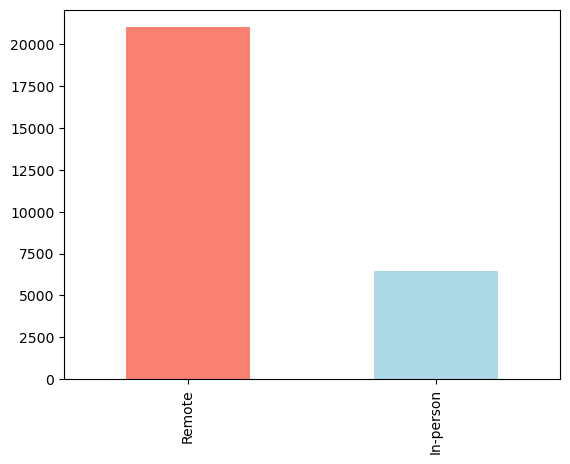

In [21]:
df["RemoteWork"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [22]:
df.Age.value_counts()

25-34 years old       12337
35-44 years old        8165
45-54 years old        2847
18-24 years old        2779
55-64 years old        1090
65 years or older       224
Under 18 years old       40
Prefer not to say        14
Name: Age, dtype: int64

In [23]:
# Compare target column with Age column
pd.crosstab(df.RemoteWork, df.Age)

Age,18-24 years old,25-34 years old,35-44 years old,45-54 years old,55-64 years old,65 years or older,Prefer not to say,Under 18 years old
RemoteWork,,,,,,,,
In-person,1164,3000,1409,571,267,52,4,15
Remote,1615,9337,6756,2276,823,172,10,25


In [24]:
df["RemoteWork"] = df["RemoteWork"].map({"Remote": 1, "In-person": 0})

In [25]:
df.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,ConvertedCompYearly
1,I am a developer by profession,25-34 years old,"Employed, full-time",1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,285000.0
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,Philippines,23456.0
5,I am a developer by profession,35-44 years old,"Employed, full-time",1,Some college/university study without earning ...,21,21,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,96828.0
6,I am a developer by profession,35-44 years old,"Employed, full-time",1,Some college/university study without earning ...,4,3,"Developer, full-stack","1,000 to 4,999 employees",United States of America,135000.0
7,I am a developer by profession,25-34 years old,"Employed, full-time",1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,3,"Developer, full-stack",10 to 19 employees,United States of America,80000.0


In [26]:
# Apply label encoding to each categorical column

# Create a label encoder instance
label_encoder = LabelEncoder()


for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [27]:
df

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,ConvertedCompYearly
1,0,1,0,1,1,9,49,30,4,153,285000.0
4,0,1,2,1,1,46,33,15,5,110,23456.0
5,0,2,0,1,6,13,13,11,3,151,96828.0
6,0,2,0,1,6,33,22,15,0,153,135000.0
7,0,1,0,1,1,44,22,15,1,153,80000.0
...,...,...,...,...,...,...,...,...,...,...,...
89157,0,1,0,1,1,8,3,17,0,25,319711.0
89162,0,2,0,1,2,23,16,11,6,19,50719.0
89166,0,0,2,0,6,47,11,15,5,6,16917.0
89167,0,0,0,1,1,46,11,17,5,58,15752.0


In [28]:
# Rename the RemoteWork to target column

df.rename(columns={"RemoteWork": "target"}, inplace=True)

In [29]:
df

,MainBranch,Age,Employment,target,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,ConvertedCompYearly
1,0,1,0,1,1,9,49,30,4,153,285000.0
4,0,1,2,1,1,46,33,15,5,110,23456.0
5,0,2,0,1,6,13,13,11,3,151,96828.0
6,0,2,0,1,6,33,22,15,0,153,135000.0
7,0,1,0,1,1,44,22,15,1,153,80000.0
...,...,...,...,...,...,...,...,...,...,...,...
89157,0,1,0,1,1,8,3,17,0,25,319711.0
89162,0,2,0,1,2,23,16,11,6,19,50719.0
89166,0,0,2,0,6,47,11,15,5,6,16917.0
89167,0,0,0,1,1,46,11,17,5,58,15752.0


In [30]:
# Make a correlation matrix
df.corr()

,MainBranch,Age,Employment,target,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,ConvertedCompYearly
MainBranch,1.000000,0.081996,-0.010783,-0.139102,0.054905,0.023406,0.009716,0.119576,-0.004106,0.001860,-0.004763
Age,0.081996,1.000000,0.106341,0.097361,0.052039,-0.040408,-0.162390,0.059405,0.056544,0.116274,0.051263
Employment,-0.010783,0.106341,1.000000,0.150028,0.072690,-0.018882,-0.035440,0.019174,0.320760,-0.075868,0.017043
target,-0.139102,0.097361,0.150028,1.000000,-0.007174,-0.082900,-0.023293,-0.050118,0.040720,0.096006,0.034298
EdLevel,0.054905,0.052039,0.072690,-0.007174,1.000000,0.003737,-0.022575,0.010976,0.038062,-0.061560,-0.011067
YearsCode,0.023406,-0.040408,-0.018882,-0.082900,0.003737,1.000000,0.149863,-0.008864,0.003288,0.002105,-0.009638
YearsCodePro,0.009716,-0.162390,-0.035440,-0.023293,-0.022575,0.149863,1.000000,-0.032510,-0.007429,-0.012319,-0.009019
DevType,0.119576,0.059405,0.019174,-0.050118,0.010976,-0.008864,-0.032510,1.000000,0.005334,0.017893,0.005871
OrgSize,-0.004106,0.056544,0.320760,0.040720,0.038062,0.003288,-0.007429,0.005334,1.000000,-0.031959,0.012207
Country,0.001860,0.116274,-0.075868,0.096006,-0.061560,0.002105,-0.012319,0.017893,-0.031959,1.000000,0.044541


## Machine learning modelling

Now that we've prepared our data, it's time to build a machine learning model.

We will split the data into 80% train set and 20% split set

We'll train it (find patterns) using the training set.

And we'll test it (evaluate its performance) using the test set.

We're going to try two different machine learning models:

1. Logistic Regression
2. Random Forest Classifier

In [31]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [32]:
X

,MainBranch,Age,Employment,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,ConvertedCompYearly
1,0,1,0,1,9,49,30,4,153,285000.0
4,0,1,2,1,46,33,15,5,110,23456.0
5,0,2,0,6,13,13,11,3,151,96828.0
6,0,2,0,6,33,22,15,0,153,135000.0
7,0,1,0,1,44,22,15,1,153,80000.0
...,...,...,...,...,...,...,...,...,...,...
89157,0,1,0,1,8,3,17,0,25,319711.0
89162,0,2,0,2,23,16,11,6,19,50719.0
89166,0,0,2,6,47,11,15,5,6,16917.0
89167,0,0,0,1,46,11,17,5,58,15752.0


In [33]:
y

1        1
4        1
5        1
6        1
7        1
        ..
89157    1
89162    1
89166    0
89167    1
89171    0
Name: target, Length: 27496, dtype: int64

In [34]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [35]:
# Define models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

In [36]:
# model fit and score helper function

def fit_and_score_cv(models, X_train, y_train, cv=5):
    """
    Fits and evaluates given machine learning models using cross-validation.

    Parameters:
    models : dict
        A dictionary of Scikit-Learn machine learning models.
    X_train : pd.DataFrame
        Training data (without labels).
    y_train : pd.Series
        Training labels.
    cv : int, default=5
        Number of cross-validation folds.

    Returns:
    model_scores : dict
        Dictionary containing mean cross-validation scores.
    """
    np.random.seed(42)  # Set random seed for reproducibility
    model_scores = {}  # Dictionary to store scores
    
    # Loop through each model
    for name, model in models.items():
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Perform cross-validation scoring
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")

        # Store mean accuracy score
        model_scores[name] = np.mean(scores)
    
    return model_scores

# Example usage:
# scores = fit_and_score_cv(models, X_train, y_train)
# print(scores)

In [37]:
train_scores = fit_and_score_cv(models=models,
                             X_train=X_train,
                             y_train=y_train)

train_scores

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'Logistic Regression': 0.7645026555622145,
 'Random Forest': 0.8007363967017298}

In [38]:
def score_cv(models, X_train, y_train, X_test, y_test, cv=5):
    """
    Fits and evaluates given machine learning models using cross-validation.

    Parameters:
    models : dict
        A dictionary of Scikit-Learn machine learning models.
    X_train : pd.DataFrame
        Training data (without labels).
    y_train : pd.Series
        Training labels.
    cv : int, default=5
        Number of cross-validation folds.

    Returns:
    model_scores : dict
        Dictionary containing mean cross-validation scores.
    """
    np.random.seed(42)  # Set random seed for reproducibility
    model_scores = {}  # Dictionary to store scores
    
    # Loop through each model
    for name, model in models.items():
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Perform cross-validation scoring
        scores = cross_val_score(model, X_test, y_test, cv=cv, scoring="accuracy")

        # Store mean accuracy score
        model_scores[name] = np.mean(scores)
    
    return model_scores

In [39]:
test_scores = score_cv(models=models,
                             X_train=X_train,
                             y_train=y_train,
                             X_test=X_test,
                              y_test=y_test)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [40]:
test_scores

{'Logistic Regression': 0.7645454545454545,
 'Random Forest': 0.7896363636363637}

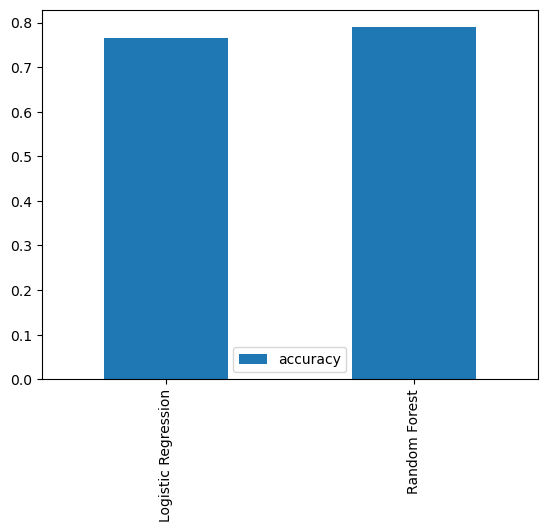

In [41]:
model_compare = pd.DataFrame(test_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Hyper-parameter tuning

We need to see if the accuracy can be improved by tuning some model hyperparameters

We will tune the models using RandomizedSearchCV approach

a. Logistic Regression

In [42]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [45]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [46]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [47]:
rs_log_reg.score(X_test, y_test)

0.7645454545454545

b. Random Forest Classifier

In [48]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [49]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [50]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [51]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8114545454545454

The tuning didnt have significant positive effect on the model performance.

In [52]:
# Make predictions with tuned model
y_preds = rs_rf.predict(X_test)
y_preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


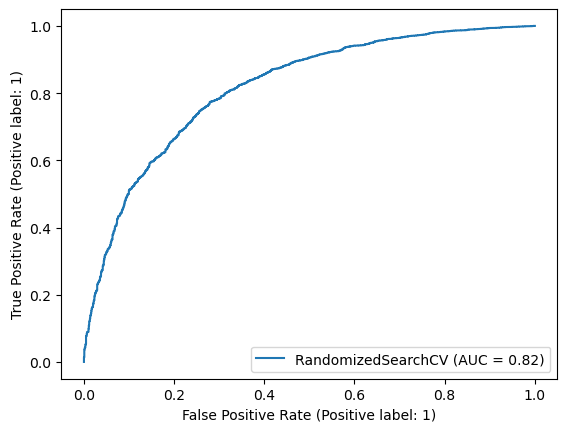

In [53]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(rs_rf, X_test, y_test)

In [54]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.69      0.36      0.48      1295
           1       0.83      0.95      0.89      4205

    accuracy                           0.81      5500
   macro avg       0.76      0.66      0.68      5500
weighted avg       0.80      0.81      0.79      5500



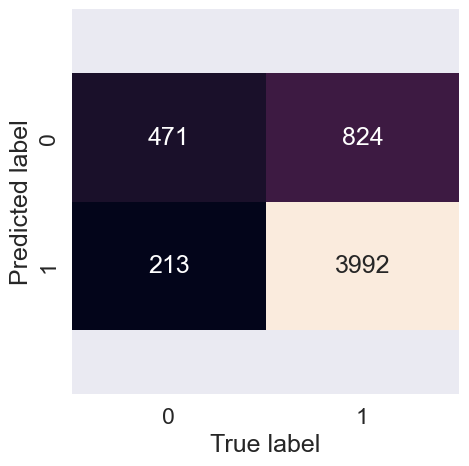

In [62]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt='d',
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom+0.5, top-0.5)
    
plot_conf_mat(y_test, y_preds)

## Feature Importance

In [68]:
# Get feature importance scores from the best Random Forest model
rf = RandomForestClassifier(n_estimators=510,
 min_samples_split= 14,
 min_samples_leaf= 1,
 max_depth= None)
rf.fit(X_test, y_test)


RandomForestClassifier(min_samples_split=14, n_estimators=510)

In [69]:
feature_importances = rf.feature_importances_

In [70]:
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": feature_importances}
).sort_values(by="Importance", ascending=False)

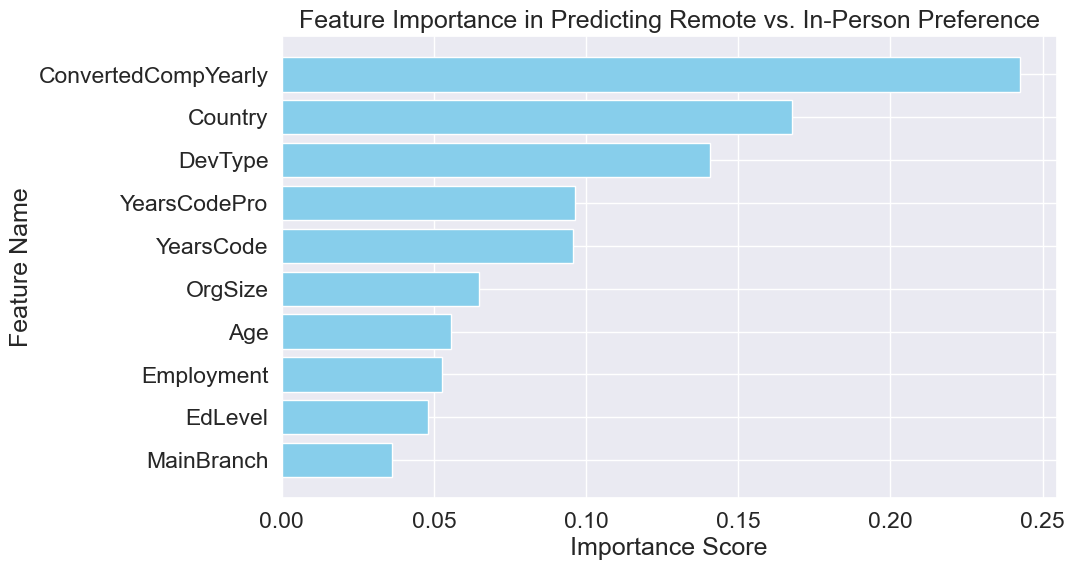

In [71]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Predicting Remote vs. In-Person Preference")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

## Next steps/Further Experimentation

To improve the current model performance, we can explore the following;

1.  Handle class imbalance by either undersampling or oversampling
2.  Add more features to the dataset
3.  Explore other null dataset handling strategies
4.  Try out some other Machine learning models.